<a href="https://colab.research.google.com/github/BarbosaXBarbosa/BIG_S3/blob/main/AvBS3_joao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando bibliotecas usadas
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("ProjetoBS3").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=27bdce7ef6de86cba3c464333345c4bc25241f90563bc9c4210a10bc1e98b6cd
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/Big_S3/Projeto/datasets/dailyclimate.csv'

dados = spark.read.options(header=True).csv(
    url,
    sep=",",
    inferSchema=True
)

In [4]:
dados.count()

883128

In [5]:
dados.show()

+---+----------+------------+--------+---------+------+--------+-----------+-----+-------+--------------+----------+----------+------------+-------------+-------------+----------------+----------------+------------------+-------------+----------------+----------------+------------------+
|_c0|      Date|    District|Latitude|Longitude|Precip|Pressure|Humidity_2m|RH_2m|Temp_2m|WetBulbTemp_2m|MaxTemp_2m|MinTemp_2m|TempRange_2m|EarthSkinTemp|WindSpeed_10m|MaxWindSpeed_10m|MinWindSpeed_10m|WindSpeedRange_10m|WindSpeed_50m|MaxWindSpeed_50m|MinWindSpeed_50m|WindSpeedRange_50m|
+---+----------+------------+--------+---------+------+--------+-----------+-----+-------+--------------+----------+----------+------------+-------------+-------------+----------------+----------------+------------------+-------------+----------------+----------------+------------------+
|  0|1981-01-01|Arghakhanchi|    27.9|     83.2|   0.0|   93.51|       4.81|45.41|  13.89|          2.15|     20.82|      9.94|      

In [6]:
# Traduzindo colunas do data set de uma análise de clima do Nepal

dados = dados.withColumnsRenamed(
    {
      "Pressure": "Pressao",
      "Date": "Data",
      "District": "Distrito",
      "Humidity_2m": "Umidade_2m",
      "RH_2m": "UmidadeRelativa_2m",
      "TempRange_2m": "FaixaTemp_2m",
      "WetBulbTemp_2m": "BulboUmidoTemp_2m",
      "EarthSkinTemp": "SuperfTerrestreTemp",
      "WindSpeed_10m": "VeloVento_10m",
      "MaxWindSpeed_10m": "VeloMaxVento_10m",
      "MinWindSpeed_10m": "VeloMiniVento_10m",
      "WindSpeedRange_10m": "FaixaVeloVento_10m",
      "WindSpeed_50m": "VeloVento_50m",
      "MaxWindSpeed_50m": "VeloMaxVento_50m",
      "MinWindSpeed_50m": "VeloMinVento_50m",
      "WindSpeedRange_50m": "FaixaVeloVento_50m"
    }
)

In [7]:
dados.show()

+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+
|_c0|      Data|    Distrito|Latitude|Longitude|Precip|Pressao|Umidade_2m|UmidadeRelativa_2m|Temp_2m|BulboUmidoTemp_2m|MaxTemp_2m|MinTemp_2m|FaixaTemp_2m|SuperfTerrestreTemp|VeloVento_10m|VeloMaxVento_10m|VeloMiniVento_10m|FaixaVeloVento_10m|VeloVento_50m|VeloMaxVento_50m|VeloMinVento_50m|FaixaVeloVento_50m|
+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+
|  0|1981-01-01|Arghakhanchi|    27.9|     83.2|   0.0|  93.51|      4

In [8]:
dados.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Data: date (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Precip: double (nullable = true)
 |-- Pressao: double (nullable = true)
 |-- Umidade_2m: double (nullable = true)
 |-- UmidadeRelativa_2m: double (nullable = true)
 |-- Temp_2m: double (nullable = true)
 |-- BulboUmidoTemp_2m: double (nullable = true)
 |-- MaxTemp_2m: double (nullable = true)
 |-- MinTemp_2m: double (nullable = true)
 |-- FaixaTemp_2m: double (nullable = true)
 |-- SuperfTerrestreTemp: double (nullable = true)
 |-- VeloVento_10m: double (nullable = true)
 |-- VeloMaxVento_10m: double (nullable = true)
 |-- VeloMiniVento_10m: double (nullable = true)
 |-- FaixaVeloVento_10m: double (nullable = true)
 |-- VeloVento_50m: double (nullable = true)
 |-- VeloMaxVento_50m: double (nullable = true)
 |-- VeloMinVento_50m: double (nullable = true)
 |-- FaixaVeloVento_50m: double (nu

In [9]:
# Mudando o formato da data para a tradução ficar mais proxima do Brasil
dados = dados.withColumn("Data", f.date_format("Data", "dd/MM/yyyy"))
dados.show()

+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+
|_c0|      Data|    Distrito|Latitude|Longitude|Precip|Pressao|Umidade_2m|UmidadeRelativa_2m|Temp_2m|BulboUmidoTemp_2m|MaxTemp_2m|MinTemp_2m|FaixaTemp_2m|SuperfTerrestreTemp|VeloVento_10m|VeloMaxVento_10m|VeloMiniVento_10m|FaixaVeloVento_10m|VeloVento_50m|VeloMaxVento_50m|VeloMinVento_50m|FaixaVeloVento_50m|
+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+
|  0|01/01/1981|Arghakhanchi|    27.9|     83.2|   0.0|  93.51|      4

In [10]:
# Convertendo campo de umidade relativa para porcentagem para poder visualizar

dados = dados.withColumn("UmidadeRelativa%", f.concat((f.round(dados["UmidadeRelativa_2m"]).cast("int")).cast("string"), f.lit("%")))

# f.lit() adiciona um valor constante na coluna

dados.show()

+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+----------------+
|_c0|      Data|    Distrito|Latitude|Longitude|Precip|Pressao|Umidade_2m|UmidadeRelativa_2m|Temp_2m|BulboUmidoTemp_2m|MaxTemp_2m|MinTemp_2m|FaixaTemp_2m|SuperfTerrestreTemp|VeloVento_10m|VeloMaxVento_10m|VeloMiniVento_10m|FaixaVeloVento_10m|VeloVento_50m|VeloMaxVento_50m|VeloMinVento_50m|FaixaVeloVento_50m|UmidadeRelativa%|
+---+----------+------------+--------+---------+------+-------+----------+------------------+-------+-----------------+----------+----------+------------+-------------------+-------------+----------------+-----------------+------------------+-------------+----------------+----------------+------------------+----------------+
|  0|01/01/1981|Arg

In [11]:
# Criando view dos dados

dados.createOrReplaceTempView("v_clima")

In [14]:
# Usando a função spark.sql():
spark.sql(
"""
SELECT Distrito, UmidadeRelativa_2m, FaixaTemp_2m
FROM V_CLIMA
"""
).show(15, False)

+------------+------------------+------------+
|Distrito    |UmidadeRelativa_2m|FaixaTemp_2m|
+------------+------------------+------------+
|Arghakhanchi|45.41             |10.89       |
|Arghakhanchi|46.78             |11.17       |
|Arghakhanchi|47.91             |9.93        |
|Arghakhanchi|50.83             |10.41       |
|Arghakhanchi|55.55             |10.53       |
|Arghakhanchi|59.18             |9.53        |
|Arghakhanchi|65.22             |7.74        |
|Arghakhanchi|57.6              |9.69        |
|Arghakhanchi|53.49             |9.56        |
|Arghakhanchi|51.0              |10.84       |
|Arghakhanchi|51.86             |9.56        |
|Arghakhanchi|61.7              |7.69        |
|Arghakhanchi|66.74             |10.51       |
|Arghakhanchi|48.92             |11.81       |
|Arghakhanchi|39.15             |10.99       |
+------------+------------------+------------+
only showing top 15 rows



In [21]:
# Média da umidade relativa e da faixa de temperatura por Distrito

spark.sql(
"""
SELECT  Distrito,
        ROUND(AVG(UmidadeRelativa_2m), 2) AS mediaUmidadeRelativa_PerCent,
        ROUND(AVG(FaixaTemp_2m), 2) as mediaFaixaTemperatura_Celsius
FROM V_CLIMA
GROUP BY Distrito
ORDER BY Distrito
"""
).show()

+------------+----------------------------+-----------------------------+
|    Distrito|mediaUmidadeRelativa_PerCent|mediaFaixaTemperatura_Celsius|
+------------+----------------------------+-----------------------------+
|Arghakhanchi|                       49.78|                        10.93|
|     Baglung|                       57.47|                        10.04|
|     Baitadi|                       54.87|                        11.44|
|      Bajang|                       58.44|                        11.84|
|       Banke|                       49.28|                         11.2|
|        Bara|                        50.8|                         11.1|
|     Bardiya|                       47.44|                        11.83|
|   Bhaktapur|                       58.58|                        10.05|
|    Chitawan|                       51.02|                        10.68|
|  Dadeldhura|                       50.29|                        11.79|
|     Dailekh|                       5

In [24]:
# Média da umidade relativa e da faixa de temperatura por Distrito

spark.sql(
"""
SELECT  Distrito,
        ROUND(AVG(MaxTemp_2m), 2) AS mediaTemperaturaMax,
        ROUND(AVG(UmidadeRelativa_2m), 2) as mediaUmidadeRelativa_PerCent,
        mediaUmidadeRelativa_PerCent/mediaTemperaturaMax as
FROM V_CLIMA
GROUP BY Distrito
ORDER BY Distrito
"""
).show()

+------------+-------------------+----------------------------+--------------------------------------------------------------------------------------------------+
|    Distrito|mediaTemperaturaMax|mediaUmidadeRelativa_PerCent|(lateralAliasReference(mediaUmidadeRelativa_PerCent) / lateralAliasReference(mediaTemperaturaMax))|
+------------+-------------------+----------------------------+--------------------------------------------------------------------------------------------------+
|Arghakhanchi|              28.85|                       49.78|                                                                                 1.725476603119584|
|     Baglung|              19.52|                       57.47|                                                                                2.9441598360655736|
|     Baitadi|              16.27|                       54.87|                                                                                 3.372464658881377|
|      Bajang|        

In [26]:
# Média da umidade relativa e da faixa de temperatura por Distrito

graphDispersao = spark.sql(
"""
SELECT  Distrito,
        ROUND(AVG(MaxTemp_2m), 2) AS mediaTemperaturaMax,
        ROUND(AVG(UmidadeRelativa_2m), 2) as mediaUmidadeRelativa_PerCent,
        mediaUmidadeRelativa_PerCent/mediaTemperaturaMax as
FROM V_CLIMA
GROUP BY Distrito
ORDER BY Distrito
"""
)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

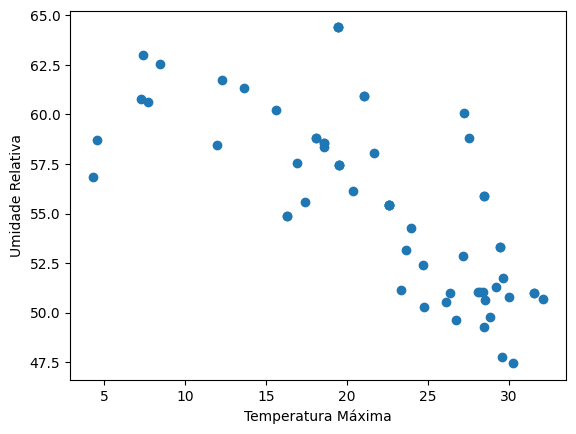

In [37]:
df = graphDispersao.toPandas()

fig, ax = plt.subplots()

# Plota os pontos no gráfico
ax.scatter(df['mediaTemperaturaMax'], df['mediaUmidadeRelativa_PerCent'])

# Define os rótulos dos eixos
ax.set_xlabel('Temperatura Máxima')
ax.set_ylabel('Umidade Relativa')

# Exibe o gráfico
plt.show()

Percebe-se que quanto menos umidade relativa apresentar uma determinada região a temperatura máxima tende a aumentar.

In [42]:
# Salvando em formato ORC o DataFrame para obter maior velocidade de pesquisa
## Utilizando uma estrutura de dados NOSQL

dados.coalesce(1).write.orc(
    "/content/drive/MyDrive/Colab Notebooks/Big_S3/Projeto/datasets/ORC",
    mode = "overwrite"
)

In [ ]:
df.head()

In [46]:
graphDispersao.coalesce(1).write.csv(
    "/content/drive/MyDrive/Colab Notebooks/Big_S3/Projeto/datasets/CSV",
    sep=",",
    mode = "overwrite",
    header=True
)